In [1]:
# NumPyをインポート（数値計算、行列操作などで使用）
import numpy as np

# NetworkXをインポート（グラフ構造の生成・操作・アルゴリズム適用に利用）
import networkx as nx

# Matplotlibのpyplotモジュールをインポート（グラフの可視化に利用）
import matplotlib.pyplot as plt

In [2]:
# 各コミュニティ間・内部の接続確率を定義（2×2の行列）
# - probs[i][j] はコミュニティ i と j のノード間の接続確率
# 今回は：
# - 同じコミュニティ内の接続確率 = 0.1（対角成分）
# - 異なるコミュニティ間の接続確率 = 0.02（非対角成分）
probs = [
    [0.1, 0.02],
    [0.02, 0.1],
]

# コミュニティ1のノード数（50個）
n1 = 50

# コミュニティ2のノード数（50個）
n2 = 50

# 総ノード数
n = n1 + n2

# ストキャスティック・ブロック・モデル（SBM）に基づくグラフの生成
# - ノード数：[50, 50] → 2つのコミュニティ
# - 接続確率行列：probs
# - seed：再現性のための乱数シード
G = nx.stochastic_block_model([n1, n2], probs, seed=0)  # グラフの生成

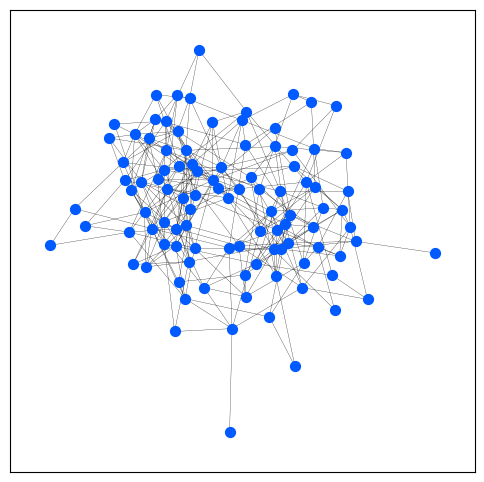

In [3]:
# spring_layout（ばねレイアウト）を使ってノードの描画位置を決定
# - グラフの構造を保ちつつ、ノードが見やすいように配置
# - 引数 seed を指定することで配置の再現性を確保
pos = nx.layout.spring_layout(G, seed=3)

# 描画用のFigureとAxesを作成（正方形のサイズ 6x6インチ）
fig, ax = plt.subplots(figsize=(6, 6))

# グラフを描画（NetworkXの draw_networkx を使用）
nx.draw_networkx(
    G,  # 対象のグラフ
    pos,  # ノードの位置（上で spring_layout により定義）
    ax=ax,  # 描画に使用する Axes オブジェクト
    with_labels=False,  # ノードラベル（番号など）は描画しない
    width=0.2,  # エッジの線の太さ
    node_size=50,  # ノードの大きさ（ピクセル単位）
    node_color="#005aff",  # ノードの色（青系）
)